# Before we begin: the mathematical building blocks of neural networks

- Hello World!
    - Basic NN keras program blocks
- Data representation for DL:
    - Tensors: Rank vs. Dimension        
    - Tensors ranks: Scalar (0D), Vector (1D), Matrix (2D), TimeSeries (3D), Image (4D), Video (5D)
    - Data notations: Batches, Vector, Image, Time, Video
- Basic tensor operations
    - Digression: Tensor operations, Broadcasting, Reshape vs. Transpose
- Gradient-based optimization
    - Training loop
    - Stochastic Gradient Descent (SGD)
    - Backpropagation
- NN Anatomy:
    - Data
    - Model
    - Loss
    - Optimizer
    


## Four ingredients of Supervised learning framework:
![03_1_Anatomy_NN.png](https://github.com/ahmadelsallab/practical_dl/blob/master/Keras/notebooks/imgs/03_1_Anatomy_NN.png?raw=true)



- Data --> $X$ and $y$

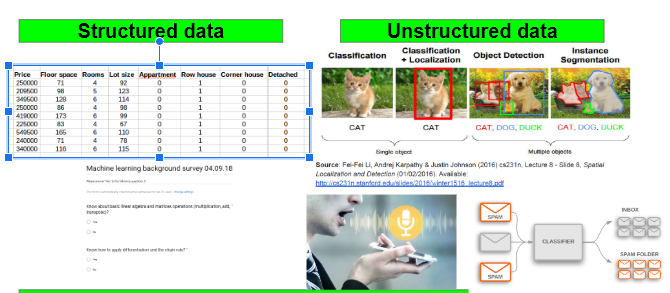
- Model --> hypothesis $\hat{y} = h(X)$ input-output relationship
- Loss/Objective/Cost --> $J(\theta) = f(y,\hat{y})$. For MSE, $J(\theta) = \frac{1}{2m} \sum_{i=0}^{m} (y_i - \hat{y}_i)^2$
- Optimizer --> Algorithm to solve/find optimal set of model parameters $\theta^*$

$$\theta^* = argmin_{\theta} J(\theta)$$



## A first look at a neural network

We will now take a look at a first concrete example of a neural network, which makes use of the Python library Keras to learn to classify 
hand-written digits. Unless you already have experience with Keras or similar libraries, you will not understand everything about this 
first example right away. You probably haven't even installed Keras yet. Don't worry, that is perfectly fine. In the next chapter, we will 
review each element in our example and explain them in detail. So don't worry if some steps seem arbitrary or look like magic to you! 
We've got to start somewhere.

Training a neural network revolves around the following
objects:
- Layers, which are combined into a network (or model)
- The input data and corresponding targets
- The loss function, which defines the feedback signal used for learning
- The optimizer, which determines how learning proceeds



### Data

The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 
categories (0 to 9). The dataset we will use is the MNIST dataset, a classic dataset in the machine learning community, which has been 
around for almost as long as the field itself and has been very intensively studied. It's a set of 60,000 training images, plus 10,000 test 
images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. You can think of "solving" MNIST 
as the "Hello World" of deep learning -- it's what you do to verify that your algorithms are working as expected. As you become a machine 
learning practitioner, you will see MNIST come up over and over again, in scientific papers, blog posts, and so on.

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [1]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_images ,train_labels, test_size=0.2, shuffle=True)

`train_images` and `train_labels` form the "training set", the data that the model will learn from. The model will then be tested on the 
"test set", `test_images` and `test_labels`. Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging 
from 0 to 9. There is a one-to-one correspondence between the images and the labels.

Let's have a look at the training data:

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels.shape

(10000,)

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [11]:
train_images.shape

(60000, 784)

We also need to categorically encode the labels, a step which we explain in chapter 3:

In [12]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
train_labels.shape

(60000, 10)

### Model

In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', name='Layer_1', input_shape=(28 * 28,)))

network.add(layers.Dense(10, activation='softmax'))

In [66]:
network.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


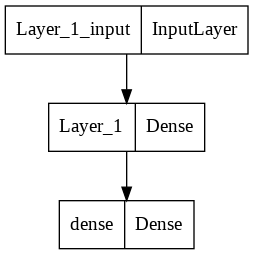

In [15]:
from tensorflow.keras.utils import plot_model
plot_model(network)

In [16]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

### Learning

We are now ready to train our network, which in Keras is done via a call to the `fit` method of the network: 
we "fit" the model to its training data.

In [17]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2565 - accuracy: 0.9246
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1032 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0685 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0493 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0370 - accuracy: 0.9891


Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over 
the training data.

We quickly reach an accuracy of 0.989 (i.e. 98.9%) on the training data. Now let's check that our model performs well on the test set too:

In [18]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0775 - accuracy: 0.9766


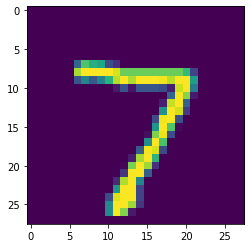

In [19]:
import matplotlib.pyplot as plt
import numpy as np
img = test_images[0]
plt.imshow(np.reshape(img, (28,28)))


In [20]:
img.shape

(784,)

In [21]:
network.predict(np.reshape(img, (1,784)))

array([[8.9957142e-10, 2.4196634e-10, 1.4018262e-06, 6.1155402e-04,
        4.8866466e-12, 8.2183309e-09, 8.4097517e-14, 9.9938679e-01,
        4.2112436e-08, 2.0841493e-07]], dtype=float32)

In [24]:
np.argmax(network.predict(np.reshape(img, (1,784))))

7

In [75]:
#np.max(network.predict(np.reshape(img, (1,784))))

In [24]:
print('test_acc:', test_acc)

test_acc: 0.975600004196167


__What it means?__

$\frac{\partial{L}}{\partial{z}}$ is the error contribution due to $z$.

_Now, what is the distribution of that error on $x$ and $y$?_

The answer by chain is by weighting the upper error by the next gradients (=sensitivity) to each of x and y.

## Backprop
In the previous algorithm, we casually assumed that because a function is differentiable,
we can explicitly compute its derivative. In practice, a neural network function
consists of many tensor operations chained together, each of which has a simple,
known derivative. For instance, this is a network f composed of three tensor operations,
a, b, and c, with weight matrices W1, W2, and W3:

`f(W1, W2, W3) = a(W1, b(W2, c(W3)))`
Calculus tells us that such a chain of functions can be derived using the following identity,
called the chain rule: `f(g(x)) = f'(g(x)) * g'(x)`. Applying the chain rule to the
computation of the gradient values of a neural network gives rise to an algorithm called Backpropagation (also sometimes called reverse-mode differentiation). 

Backpropagation starts with the final loss value and works backward from the top layers to the bottom
layers, applying the chain rule to compute the contribution that each parameter
had in the loss value.
![image.png](attachment:image.png)

### Symbolic differentiation
Nowadays, and for years to come, people will implement networks in modern
frameworks that are capable of symbolic differentiation, such as TensorFlow. This means
that, given a chain of operations with a known derivative, they can compute a gradient
function for the chain (by applying the chain rule) that maps network parameter values
to gradient values. When you have access to such a function, the backward pass is
reduced to a call to this gradient function. Thanks to symbolic differentiation, you’ll
never have to implement the Backpropagation algorithm by hand. For this reason, we
won’t waste your time and your focus on deriving the exact formulation of the Backpropagation
algorithm in these pages. All you need is a good understanding of how
gradient-based optimization works.


# NN Anatomy (Revision of 1st example)
## 1. Data

In [25]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

## 2. Model

In [26]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [27]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## 3. Loss
## 4. Optimizer
Both under one step in Keras called compile

In [28]:
network.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',    #sparse_categorical_crossentropy'
metrics=['accuracy'])

In [29]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2580 - accuracy: 0.9252
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1026 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0677 - accuracy: 0.9798
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0485 - accuracy: 0.9855
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0374 - accuracy: 0.9886


# Why the above error?
Let's have a look on the labels

In [30]:
train_labels.shape

(60000,)

In [31]:
train_labels[0]

5

Our final activation is 'softmax', and our loss is 'categorial'.

This means that, our output must be consistent with softmax output.

That format is called __One-Hot Encoding__

In [32]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
print(train_labels.shape)
print(train_labels[0])

(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [33]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [34]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [35]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2551 - accuracy: 0.9264
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1052 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0687 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0504 - accuracy: 0.9846
Epoch 5/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0372 - accuracy: 0.9890


Another solution

60,000x5 is too much RAM!

Use sparse_categorical_crossentroppy loss

Expand only when needed --> batch

In [36]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.2555 - accuracy: 0.9260
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1044 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0683 - accuracy: 0.9799
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0500 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0384 - accuracy: 0.9886
